In [1]:
import pandas as pd

In [2]:
sensor_data = [
    ("S1", "2025-04-28 10:00", 35.2, 12.1, 0.002),
    ("S2", "2025-04-28 10:00", 36.5, 14.0, 0.003),
    ("S1", "2025-04-28 11:00", 36.1, 12.5, 0.0021),
    ("S3", "2025-04-28 10:00", 34.0, 11.8, 0.0025),
    ("S2", "2025-04-28 11:00", 37.2, 14.3, 0.0031),
    ("S1", "2025-04-28 12:00", 37.0, 13.0, 0.0022),
]

In [3]:
columns = ['Sensor_ID', 'Timestamp', 'Temperature', 'Stress', 'Displacement']

In [5]:
df = pd.DataFrame(sensor_data, columns=columns)
print(df)

  Sensor_ID         Timestamp  Temperature  Stress  Displacement
0        S1  2025-04-28 10:00         35.2    12.1        0.0020
1        S2  2025-04-28 10:00         36.5    14.0        0.0030
2        S1  2025-04-28 11:00         36.1    12.5        0.0021
3        S3  2025-04-28 10:00         34.0    11.8        0.0025
4        S2  2025-04-28 11:00         37.2    14.3        0.0031
5        S1  2025-04-28 12:00         37.0    13.0        0.0022


In [8]:
# Parse timestamps
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Ensure appropriate data types (Pandas often infers correctly, but explicit conversion is possible)
df["Temperature"] = df["Temperature"].astype(float)
df["Stress"] = df["Stress"].astype(float)
df["Displacement"] = df["Displacement"].astype(float)

print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sensor_ID     6 non-null      object        
 1   Timestamp     6 non-null      datetime64[ns]
 2   Temperature   6 non-null      float64       
 3   Stress        6 non-null      float64       
 4   Displacement  6 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 372.0+ bytes
None
  Sensor_ID           Timestamp  Temperature  Stress  Displacement
0        S1 2025-04-28 10:00:00         35.2    12.1        0.0020
1        S2 2025-04-28 10:00:00         36.5    14.0        0.0030
2        S1 2025-04-28 11:00:00         36.1    12.5        0.0021
3        S3 2025-04-28 10:00:00         34.0    11.8        0.0025
4        S2 2025-04-28 11:00:00         37.2    14.3        0.0031
5        S1 2025-04-28 12:00:00         37.0    13.0        0.0022


In [15]:
avg_temp= df["Temperature"].mean()

In [16]:
avg_stress= df["Stress"].mean()
avg_disp= df["Displacement"].mean()

In [17]:
print(f"  Average Temperature: {avg_temp:.2f} °C")
print(f"  Average Stress: {avg_stress:.2f}")
print(f"  Average Displacement: {avg_disp:.4f}")

  Average Temperature: 36.00 °C
  Average Stress: 12.95
  Average Displacement: 0.0025


In [18]:
avg_stress_per_sensor = df.groupby("Sensor_ID")["Stress"].mean()
sensor_with_max_stress = avg_stress_per_sensor.idxmax()
max_avg_stress = avg_stress_per_sensor.max()

print(f"Sensor with the highest average stress: {sensor_with_max_stress}")
print(f"Average Stress: {max_avg_stress:.2f}")

Sensor with the highest average stress: S2
Average Stress: 14.15


In [20]:
high_temp_readings = df[df["Temperature"] > 36.0]
print("High temperature readings:\n", high_temp_readings)

High temperature readings:
   Sensor_ID           Timestamp  Temperature  Stress  Displacement
1        S2 2025-04-28 10:00:00         36.5    14.0        0.0030
2        S1 2025-04-28 11:00:00         36.1    12.5        0.0021
4        S2 2025-04-28 11:00:00         37.2    14.3        0.0031
5        S1 2025-04-28 12:00:00         37.0    13.0        0.0022


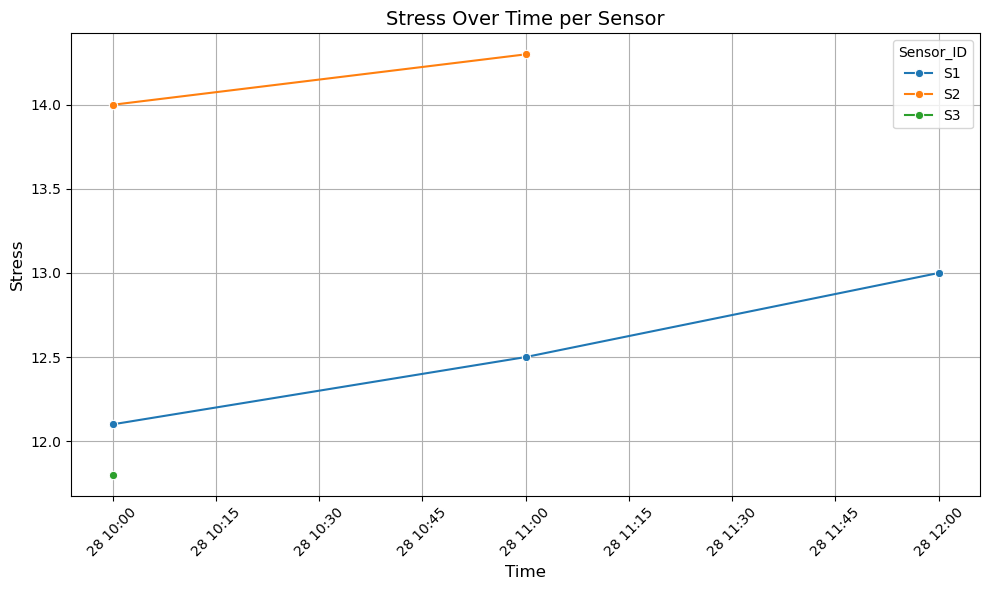

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Timestamp", y="Stress", hue="Sensor_ID", marker="o")

plt.title("Stress Over Time per Sensor", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Stress", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [31]:
temp_thresh = 36.5
stress_thresh = 14.0
disp_thresh = 0.003

anomalies = df[
    (df["Temperature"] > temp_thresh) |
    (df["Stress"] > stress_thresh) |
    (df["Displacement"] > disp_thresh)
]

print("Anomalies values:")
print(anomalies)

Anomalies values:
  Sensor_ID           Timestamp  Temperature  Stress  Displacement
4        S2 2025-04-28 11:00:00         37.2    14.3        0.0031
5        S1 2025-04-28 12:00:00         37.0    13.0        0.0022


In [2]:
import pandas as pd

data = [
    ("S2", "2025-04-28 10:00:00", 36.5, 14.0, 0.0030),
    ("S1", "2025-04-28 11:00:00", 36.1, 12.5, 0.0021),
    ("S2", "2025-04-28 11:00:00", 37.2, 14.3, 0.0031),
    ("S1", "2025-04-28 12:00:00", 37.0, 13.0, 0.0022)
]

df = pd.DataFrame(data, columns=["Sensor", "Timestamp", "Temperature", "Stress", "Displacement"])
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Now run describe
print(df.describe())

                 Timestamp  Temperature     Stress  Displacement
count                    4     4.000000   4.000000      4.000000
mean   2025-04-28 11:00:00    36.700000  13.450000      0.002600
min    2025-04-28 10:00:00    36.100000  12.500000      0.002100
25%    2025-04-28 10:45:00    36.400000  12.875000      0.002175
50%    2025-04-28 11:00:00    36.750000  13.500000      0.002600
75%    2025-04-28 11:15:00    37.050000  14.075000      0.003025
max    2025-04-28 12:00:00    37.200000  14.300000      0.003100
std                    NaN     0.496655   0.842615      0.000523


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sensor data
sensor_data = [
    ("S1", "2025-04-28 10:00", 35.2, 12.1, 0.002),
    ("S2", "2025-04-28 10:00", 36.5, 14.0, 0.003),
    ("S1", "2025-04-28 11:00", 36.1, 12.5, 0.0021),
    ("S3", "2025-04-28 10:00", 34.0, 11.8, 0.0025),
    ("S2", "2025-04-28 11:00", 37.2, 14.3, 0.0031),
    ("S1", "2025-04-28 12:00", 37.0, 13.0, 0.0022),
]

# Convert to DataFrame
df = pd.DataFrame(sensor_data, columns=["sensor_id", "timestamp", "temperature", "stress", "displacement"])
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Encode sensor_id
le = LabelEncoder()
df['sensor_encoded'] = le.fit_transform(df['sensor_id'])

# Extract timestamp features (optional for time-based trends)
df['hour'] = df['timestamp'].dt.hour

# Features & target
X = df[['sensor_encoded', 'temperature', 'displacement', 'hour']]
y = df['stress']



In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [5]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.0053
R² Score: 0.9942


In [6]:
# Predict stress for new sample: S2, 36.8°C, 0.0030 displacement, 13:00
sample = pd.DataFrame({
    'sensor_encoded': [le.transform(['S2'])[0]],
    'temperature': [36.8],
    'displacement': [0.0030],
    'hour': [13]
})

predicted_stress = model.predict(sample)
print(f"Predicted Stress: {predicted_stress[0]:.4f}")


Predicted Stress: 12.8412


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

# Sensor data
sensor_data = [
    ("S1", "2025-04-28 10:00", 35.2, 12.1, 0.002),
    ("S2", "2025-04-28 10:00", 36.5, 14.0, 0.003),
    ("S1", "2025-04-28 11:00", 36.1, 12.5, 0.0021),
    ("S3", "2025-04-28 10:00", 34.0, 11.8, 0.0025),
    ("S2", "2025-04-28 11:00", 37.2, 14.3, 0.0031),
    ("S1", "2025-04-28 12:00", 37.0, 13.0, 0.0022),
]

df = pd.DataFrame(sensor_data, columns=["sensor_id", "timestamp", "temperature", "stress", "displacement"])
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Encode sensor_id
le = LabelEncoder()
df["sensor_encoded"] = le.fit_transform(df["sensor_id"])
df["hour"] = df["timestamp"].dt.hour

# Features for anomaly detection
features = df[["sensor_encoded", "temperature", "stress", "displacement", "hour"]]

model = IsolationForest(contamination=0.2, random_state=42)  # Assume ~20% are anomalies
df["anomaly"] = model.fit_predict(features)  # -1 = anomaly, 1 = normal


In [9]:
# Print anomalies
anomalies = df[df["anomaly"] == -1]
print(" Anomalies Detected:\n", anomalies)

# Print normal data
normals = df[df["anomaly"] == 1]
print("\n Normal Readings:\n", normals)


 Anomalies Detected:
   sensor_id           timestamp  temperature  stress  displacement  \
3        S3 2025-04-28 10:00:00         34.0    11.8        0.0025   

   sensor_encoded  hour  anomaly  
3               2    10       -1  

 Normal Readings:
   sensor_id           timestamp  temperature  stress  displacement  \
0        S1 2025-04-28 10:00:00         35.2    12.1        0.0020   
1        S2 2025-04-28 10:00:00         36.5    14.0        0.0030   
2        S1 2025-04-28 11:00:00         36.1    12.5        0.0021   
4        S2 2025-04-28 11:00:00         37.2    14.3        0.0031   
5        S1 2025-04-28 12:00:00         37.0    13.0        0.0022   

   sensor_encoded  hour  anomaly  
0               0    10        1  
1               1    10        1  
2               0    11        1  
4               1    11        1  
5               0    12        1  


In [11]:
import pandas as pd

sensor_data = [
    ("S1", "2025-04-28 10:00", 35.2, 12.1, 0.002, "Healthy"),
    ("S2", "2025-04-28 10:00", 36.5, 14.0, 0.003, "Warning"),
    ("S1", "2025-04-28 11:00", 36.1, 12.5, 0.0021, "Healthy"),
    ("S3", "2025-04-28 10:00", 34.0, 11.8, 0.0025, "Healthy"),
    ("S2", "2025-04-28 11:00", 37.2, 14.3, 0.0031, "Critical"),
    ("S1", "2025-04-28 12:00", 37.0, 13.0, 0.0022, "Warning"),
]

# Load DataFrame
df = pd.DataFrame(sensor_data, columns=["sensor_id", "timestamp", "temperature", "stress", "displacement", "health_state"])
df["timestamp"] = pd.to_datetime(df["timestamp"])

from sklearn.preprocessing import LabelEncoder

# Label encode sensor_id and health_state
le_sensor = LabelEncoder()
df["sensor_encoded"] = le_sensor.fit_transform(df["sensor_id"])

le_health = LabelEncoder()
df["health_label"] = le_health.fit_transform(df["health_state"])  # 0 = Critical, 1 = Healthy, 2 = Warning

# Optional: time-based feature
df["hour"] = df["timestamp"].dt.hour

# Features & target
X = df[["sensor_encoded", "temperature", "stress", "displacement", "hour"]]
y = df["health_label"]

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_health.classes_))


              precision    recall  f1-score   support

    Critical       0.00      0.00      0.00         0
     Healthy       1.00      1.00      1.00         1
     Warning       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



C:\Users\Windows 10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Windows 10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Windows 10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Windows 10\anaconda3\Lib

In [14]:
sample = pd.DataFrame({
    "sensor_encoded": [le_sensor.transform(["S2"])[0]],
    "temperature": [36.9],
    "stress": [14.5],
    "displacement": [0.0032],
    "hour": [13]
})

predicted_label = clf.predict(sample)[0]
predicted_state = le_health.inverse_transform([predicted_label])[0]

print(f"Predicted Structural Health State: {predicted_state}")


Predicted Structural Health State: Critical
